In [1]:
from glob import glob
from os.path import splitext
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
train_images = glob("../data/train/*.jpg")

In [15]:
def get_set(d):
    s = []
    for im in d:
        arr = np.asarray(Image.open(im))
        arr = arr / np.max(arr)
        arr *= 2
        arr -= 1
        s.append(arr)
    return np.array(s)

In [16]:
trainset = get_set(train_images)

In [114]:
from sklearn import mixture
from sklearn.cluster import DBSCAN, OPTICS, KMeans

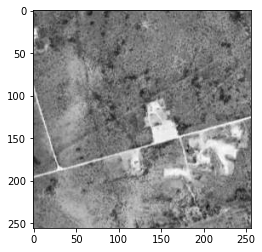

In [268]:
image_num = 1
current_image = trainset[image_num]
current_image_flat = current_image.reshape(-1,1)
plt.imshow(current_image, cmap='gray')
plt.show()

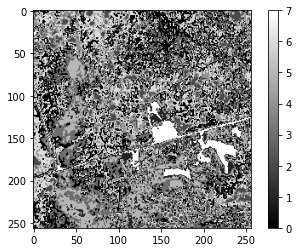

In [237]:
g = KMeans(n_clusters=8)# mixture.GaussianMixture(n_components=3)
g.fit(current_image_flat)
separated_components = g.predict(current_image_flat).reshape(256,256)
plt.imshow(separated_components, cmap='gray')
plt.colorbar()
plt.show()

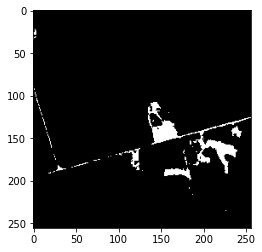

In [240]:
label = 7
kept_pixels = np.array(np.where(separated_components == label)).T
o_i = np.zeros((256,256))
for pixel in kept_pixels:
    o_i[pixel[0], pixel[1]] = label if label != 0 else 1
plt.imshow(o_i, cmap='gray')

In [265]:
scan = KMeans(n_clusters=3)# DBSCAN(eps=1, min_samples=2) # OPTICS(min_samples=3) # 
res = scan.fit_predict(kept_pixels)
res = res[np.where(res != -1)]
output_im = np.zeros((256,256))
for pixel, label in zip(kept_pixels, res):
    output_im[pixel[0], pixel[1]] = label

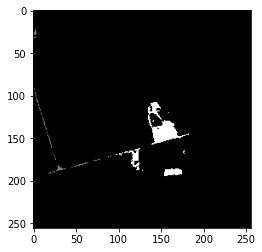

In [266]:
plt.imshow(output_im, cmap='gray')